<a href="https://colab.research.google.com/github/kankeinai/physics_classes/blob/main/a02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PHYS270 Assigmment 2: Numerical Errors**
Student Name: Begantsova Milana

---
## Abstract
In this experiment, I examine contribution of truncation and round-off error by computing "ideal" values with mathematical formula and comparing them with approximated values. The result of the experiment is two graphs of relative error versus number of iterations.

---
##Introduction
There are
three major sources of error in computation: ***human errors, truncation errors, and round-off
bold text***. Human errors occur when someone makes mistakes in the formula (parenthesis), misused some operations or just forget something, for example to take absolute value. But examining of human errors is not the part of this experiment. In this work, I study the effect of truncation error and try to decrease the impact of round-off error. 

**Truncation error** is usually assosiated with aproximation. When it is not possible to calculate the exact answer, and we can only approximate it using constant iterations, the accuracy of our result will depend only on number of this iterations. 

The modern computer allow us to calculate values with high precision and accuracy, but still not perfect. The second contributor to error is **round-off error** which is directly assosoated with the way real numbers are stores in computers. The computer stores a number as a sequence of 0-s and 1-s. Datatypes determine how much bits will be allocated to store data/number. The number of significant figures of such numbers is not infinite, so while computing rounding may occur.

Our role as of scientist is to take into account that **values computed with computing technology are not perfect**. Sometimes to get more actual data, we should try to avoid approximation with infinite number of terms (maybe there is some mathematical analog to this formula), or use as much terms as we can to achief needed accuracy. Or we at least can decrease round-off error by allocating more memory to storing of numbers.

---
##Method



In this experiment we will mostly examine ***truncation error*** of computing, meaning the error due to approximations. This error will be evaluated using true relatative error formula. At the begining, we will examine some function $f(x)$ and will try to mathematically compute the most accurate values using function `harmonic()` from library `mpmath`. These values then will be considered as ideal ones and will be used to calculate relative error of our approximation. 

While approximation, we will use "brute force" approach, meaning guesing until achieving the right answer. To compute value of $f(x)$, I will use `numpy arrays` as they are more efficient to use than lists and for loops when we have many terms/iterations. I will increase number of iterations/terms, until I get a relative error of $\varepsilon=10^{-6}$. Then I will plot these graphs to see how relative error depends on number of iterations. At the graphs will be examined on existance of trends and dependencies. The experiment will be conducted twice with two similar formulas. This will allow to compare the situations and make trust-worthier conclusions.

During all calculations, I will use library `mpmath` that allows to store numbers with ***round-off error*** $\approx 1.3\cdot10^{-26}$, so that contrimbution of round-off error can be neglected.



---


##Experiment
In this experiment, we should suggest what are the possible sources of numerical errors while computing.

In the first part of the experiment, we should use formula:
> $$f(x) = \sum\limits_{k=1}^{\infty} \frac{1}{k(k+x)} (1)$$

and derive formula that will allow us to compute accurate values of $f(x)$, where $x$ can be any real number. To derive this formula, we will substitute different values of $f(x)$ and try to see any pattern. At the end, we will compute accurate values of $f(0), f(0.9), f(20)$.






In the second part, we will use formula(1) with upper-limit $n$, where $n$ will be number of terms/iterations. We will use "brute force" approach to calculate how many iterations will allow us to compute $f(x)$ with relative error of $\varepsilon=10^{-6}$. To see how the realtive error changes with increasing number of iterations, we will plot a graph of $n$ versus $\varepsilon$ for different values of $f(x)$. 

In the last part of experiment, we will do the same procedure as in the second part, but instead of convergence of $f(x)$, we will examine $f(x)-f(1)$. At first, we should prove that $f(1)=1$

The purpose of this experiment is to observe and examine how the relative error changes with $k\rightarrow\infty$. This can be done by writing a function that uses original formula for $f(x)$ and by comparing it with accurate sum.

To calculate relative error, we will use next formula [1, p. 56]:

> $$\varepsilon=\frac{measured-true}{true} (2)$$

###Part 1

At first, let me import all libraries needed while the experiment. From numpy library, I will use np.arrange(1,n) function to effective calculate formula(1). I could use for-loop and lists instead, but numpy arrays has better time efficiency. As we will use "brute force" approach, it could take many iterations until the series converge. 

In the later parts we also need to plot graphs of relative error versus number of iterations. To plot this graphs, I will use matplotlib.

The use of library mpmath will be explained later.


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import harmonic, mp
from math import sqrt

As it was stated at the begining of the experiment, we should calculate accurate values for $f(0), f(0.9), f(20)$, where $f(x)$ is formula (1).

If we substitute $x=0$, we will get the formula known as Basels problem. The analytical solution of Basels problem states that value of $f(0)$ is

> $$f(0) = \sum\limits_{k=1}^{\infty} \frac{1}{k^2}=\frac{\pi^2}{6}$$


We can prove it mathematically, but it's not part of our experiment.

To derive formula for $f(x)$, where $x\neq0$, lets substitute next values $x=0.9, x=20$:
$$f(0.9) = \sum\limits_{k=1}^{\infty} \frac{1}{k(k+0.9)}=\frac{10}{9}\sum\limits_{k=1}^{\infty} \left[\frac{1}{k}-\frac{1}{k+0.9}\right]=\frac{10}{9}\sum\limits_{k=1}^{0.9}\frac{1}{k}$$

$$f(20) = \sum\limits_{k=1}^{\infty} \frac{1}{k(k+20)}=\frac{1}{20}\sum\limits_{k=1}^{\infty}\left[ \frac{1}{k}-\frac{1}{k+20}\right]=\frac{1}{20}\sum\limits_{k=1}^{20}\frac{1}{k}$$

The experiment definition asks us to compute $f(x)$, where $x\in\mathbb{R}^{+}$. But mathematically our formula for $f(0.9)$ does not seem correct (the step of sum is usually 1, and upper limit should be greater then lower one).

Ignoring that fact, we can see a pattern:

> $$f(x)=\frac{1}{x}\sum\limits_{k=1}^{x}\frac{1}{k}$$


This formula is similar to definition of n-th harmonic number, except $\frac{1}{x}$ term that can be easily calculated. n-th harmonic number is the sum of reciprocals of first $n$-natural numbers.


As it turned out, some libraries of python has function named `harmonic(n)` to compute n-th harmonic number, where $n$ can be any real number. In this experiment, I used function `harmonic(n)` from library `mpmath`. The main feature of this library is that it has it's own datatype called `mpf` for storing floating point numbers. We can increase number of significant figures of `mpf` just by changing default settings. 

In [3]:
print(mp)

Mpmath settings:
  mp.prec = 53                [default: 53]
  mp.dps = 15                 [default: 15]
  mp.trap_complex = False     [default: False]


By default, the `mpmath` library stores numbers with 15 significant figures. I decided to increase this value to 25, as the purpose of the first part is to calculate accurate values of $f(x)$.

In [50]:
mp.dps=25
print(mp)

Mpmath settings:
  mp.prec = 86                [default: 53]
  mp.dps = 25                 [default: 15]
  mp.trap_complex = False     [default: False]


We can see that mp.prec (precision) insreased from 53 to 86, meaning that now 83 bits are allocated to store mantissa of a number. There is formula for computing round unit or machine precision that allows to evaluate round-off error, where $bit$ is number of bits used to store mantissa of float number.

$$\eta=2^{-bit}$$

In [5]:
print(f"Round-off error of standart float: {2**(-53)}\nRound-off error in our experiment {2**(-mp.prec)}")

Round-off error of standart float: 1.1102230246251565e-16
Round-off error in our experiment 1.2924697071141057e-26


So, you can see that mpf datatype stores values with highier accuracy:

In [62]:
eps=mp.convert(sqrt(2)*10**(-26))
eps, sqrt(2)*10**(-26)

(mpf('1.414213562373095222014256241e-26'), 1.4142135623730952e-26)

There are other python libraries, for example `scypy`, that has similar function, but the difference is that `scypy` works with default float datatype. By using `mpmath` libary, we can at decrease contribution of round-off error in $\approx$ 10 times.




The mathematical formula for $n$-th harmonic number works only for natural numbers. As you can see at the Figure 1, the graph is dicrete.
<center>
<img src="https://mathworld.wolfram.com/images/eps-gif/HarmonicNumber_1000.gif"></br>
Figure 1 - The graph of $H_n$ versus $n$
</center>

So, I wondered if a `harmonic(n)` works for real numbers.

In [6]:
print("harmonic(0.9) = ", harmonic(0.9))

harmonic(0.9) =  0.9333998260655925951072876


It seems that function works correct for real numbers too . If we look at the Figure 1, we will see that $f(0.9)\approx 1$. 

To be sure, I have looked at the documentation of `mpmath` library. As it turned out, the `harmonic(n)` computes the value of harmonic number using approximation not by summing terms as in the mathematical formula. As a result, this function works fine even for real numbers.

The final formula for accurate value of $f(x), x\geq 0$:

> $$f(x)=\frac{1}{x} \cdot harmonic(x), x\in\mathbb{R}^{+}, f(0)=\frac{\pi^2}{6}$$




Python implementation:

In [7]:
def accurate_sum(x):
  if x==0:
     return mp.pi**2/6
  elif x>0:
     return 1/x*harmonic(x)
  else:
      return "error"

Now, lets compute accurate values for $x=0, x=0.9$ and $x=20$ using our function `accurate_sum(x)`.

In [8]:
x_val=[0, 0.9, 20]

sums=[accurate_sum(x) for x in x_val]

for x, sum in zip(x_val,sums):
  print(f"f({x}) = {sum} with {mp.dps} significant figures.")

f(0) = 1.644934066848226436472415 with 25 significant figures.
f(0.9) = 1.037110917850658485065074 with 25 significant figures.
f(20) = 0.179886982857184105559922 with 25 significant figures.


###Part 2
Now, we need try to approximate value of $f(x)$ using original formula(1). I defined function `sum_series(x, n)`, which takes `x` – value of $x$, `n` – number of terms and then returns approximate $f(x)$. I predict that the accuracy of approximated $f(x)$ will increase with number of terms `n`.



In [9]:
def sum_series(x, n, part_1=True):
  k = np.arange(1,n) # create array with values (1, 2, 3 ... n)
  return np.sum(1/(k*(k+x))) # substitute each k from array to formula and sum them all


To evaluate the accuracy of our function, I will use relative error formula. The function `relative_error(measured, true)` takes `measured` – approximated value of $f(x)$, `true` – the accurate value from Part 1, and returns relative error calculated with formula (2).

In [10]:
def relative_error(measured, true):
  return abs((measured-true)/true) # formula for relative error, abs is used as error should be positive

The experiment definition ask us to compute how many iterations are needed to compute approximated value of $f(x)$ with relative error of $\varepsilon=10^{-6}$. I expect that series' convergence will take long time, so I will check relative error every 100 terms (`step=100`).

In [11]:
needed_iter = [] # will store how many iterations are needed for each value of x 
epsilon = 10e-6 # stores needed relative error
step = 100 

We need to identify with "brute force" approach how many iterations are needed to achief defined relative error. The loop will continue until needed error is achieved. If our function `sum_series(x, n)` works incorrectly, the loop will be infinite and we should recheck it. I will use the same function `find_iter()` to calculate number of iterations in the Part 3. So when I call this function in Part 3, I should set `part_2 = False ` (by default it is set to `True`). The difference between Part 2 and 3 is the function to compute.

In [12]:
def find_iter(x, true, step, part_2=True):
  k=0
  while True:
    
    if part_2:
      # sum_series(x,n) will return approximated with n-terms value of f(x)
      measured = sum_series(x,k) 
    else:
      # sum_series_new(x,n) will return approximated with n-terms value of f(x)-f(1), used in part 3
      measured = sum_series_new(x,k) 
    
    if relative_error(measured, true)>epsilon: 
      k+=step # each time our error > 10e-6, increase number of iteration by 100
    else: 
      break # if our error <= 10e-6, stop while loop
  
  return k, float(relative_error(true, measured)) # return number of iteration, error (to print it later)


Now, we have all functions needed to calculate how many iterations are needed to approximate $f(0), f(0.9), f(20)$.

> Note: `x_val` stores values of $x$, `sums` stores accurate values of $f(x)$



In [13]:
for x, true in zip(x_val, sums):
  k, err = find_iter(x, true, step) # store number of iterations and error
  needed_iter.append(k) # store number of iterations (we will need it later)
  print(f"To have f({x}) with relative error = {err:.4e} <= {epsilon}, we need {k} iterations")

To have f(0) with relative error = 9.9990e-06 <= 1e-05, we need 60800 iterations
To have f(0.9) with relative error = 9.9920e-06 <= 1e-05, we need 96500 iterations
To have f(20) with relative error = 1.0000e-05 <= 1e-05, we need 555900 iterations


We identified number of iterations, now we need to plot graph of number of iterations versus relative error. We will graph similar plot in Part 3, so I wrote a function `plot_graph(iter, error)`. We plot three graphs at the same plot, so `iter` and `error` store x, y data for all graphs.

In [26]:
def plot_graph(x_val, iter, error):
  fig, ax = plt.subplots(figsize=(15, 6))
  plt.rcParams.update({'font.size': 14})
  labels = [f"f({x})" for x in x_val]
  for x, y in zip(iter, error):
    ax.plot(x, y)
  ax.legend(labels)
  ax.set(title='Relative error vs number of terms')
  plt.yscale('log')
  plt.xlabel('k, terms',fontsize=14)
  plt.ylabel('e, value of error',fontsize=14)
  plt.show()

For each value of $x$ we generate ordered list `x_values` of elements between 0 and $k+1$ with `step=100` (so that the graph will be smooth), where k is number of iterations computed earlier.
Then we generate list `y_values` that stores relative error for each number of iterations for each element in `x_values`.

In [15]:
iterations = [] 
errors = []

for x, true, iter in zip(x_val, sums, needed_iter):

    x_values=range(0, iter+1, step)
    y_values =[relative_error(sum_series(x, n), true) for n in x_values]
    
    iterations.append(x_values)
    errors.append(y_values)
    print(f"Values for x = {x} are ready")

Values for x = 0 are ready
Values for x = 0.9 are ready
Values for x = 20 are ready


Now, we have data for all needed values of $f(x)$, and it is time to plot it.

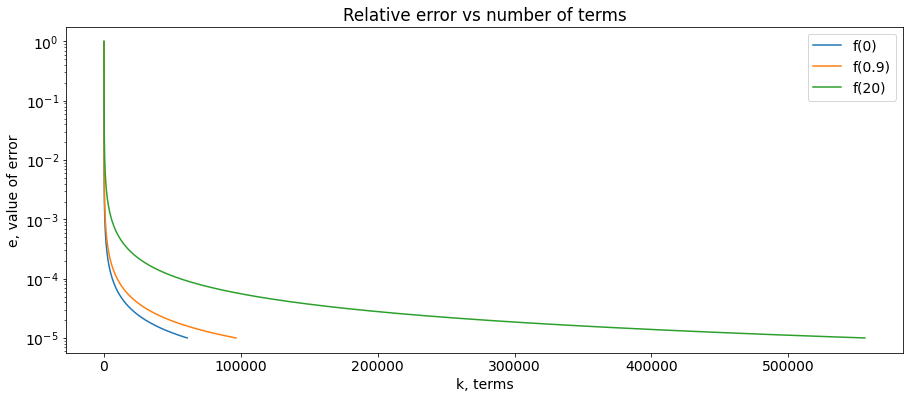

In [27]:
plot_graph(x_val, iterations, errors)

We see there that as number or iteration increases, the relative error, thus truncative error, decreases. At first it decreases dramatically, but then the absolute value gradient value decreases. With big value of $x$, it takes much more terms to approximate it. 

###Part 3
In this part we will do relatively the same procedure as in Part 2, but we will examine convergence of $f(x)-f(1)$. As, we again need accurate values for $f(x)-f(1)$, we at first should examine value of f(1).

> Note that: $$\frac{1}{k(k+1)}=\frac{1}{k}-\frac{1}{k+1}$$

Then if we substitute this expression to the initial formula, we will get:
$$f(1) = \sum\limits_{k=1}^{\infty} \frac{1}{k(k+1)}= \sum\limits_{k=1}^{\infty}\left[\frac{1}{k}-\frac{1}{k+1}\right]=\sum\limits_{k=1}^{1}\frac{1}{k}=1$$
Which is the same, as our formula for $f(x)$ in Part 1, so our function `accurate_sum(x)` should work for $f(1)$:

In [17]:
print("f(1)=", accurate_sum(1))

f(1)= 1.0


Now, we should compute how many iterations we will need for function:
$$f(x)-f(1) = \sum\limits_{k=1}^{\infty}\left[\frac{1}{k(k+x)}-\frac{1}{k}+\frac{1}{k+1}\right]$$
to converge.

Lets compute new values for $f(x)-f(1)$ with $x=0$, $x=0.9$, $x=20$

In [18]:
sums_new=[sum-accurate_sum(1) for sum in sums]

for x, sum in zip(x_val,sums_new):
  print(f"f({x}) - f(1) = {sum} with {mp.dps} significant figures.")

f(0) - f(1) = 0.6449340668482264364724152 with 25 significant figures.
f(0.9) - f(1) = 0.03711091785065848506507408 with 25 significant figures.
f(20) - f(1) = -0.820113017142815894440078 with 25 significant figures.


And modify already existing function for computing sum, as now we have additional term:

In [19]:
def sum_series_new(x, n):
  k = np.arange(1,n) # create array with values (1, 2, 3 ... n)
  return np.sum(1/(k*(k+x))-1/k+1/(k+1)) # substitute each k from array to formula and sum them all

At this time, I predict that series will converge faster, so I decreased `step` from 100 to 25, namely I will compute relative error every 25 term.

In [20]:
step = 25

We already have ready function for computing number of needed terms to approximate $f(x)$ with relative error of $\varepsilon=10^{-6}$, we just need pass additional parameter `part_2=False` to function `find_iter()`

In [21]:
needed_iter_new = []
for x, true_value in zip(x_val, sums_new):
  
  k, err = find_iter(x, true_value, step, part_2=False)
  needed_iter_new.append(k)
  
  print(f"To have f({x}) - f(1) with relative error = {err:.3e} < {epsilon}, we need {k} iterations")

To have f(0) - f(1) with relative error = 8.624e-06 < 1e-05, we need 300 iterations
To have f(0.9) - f(1) with relative error = 9.574e-06 < 1e-05, we need 375 iterations
To have f(20) - f(1) with relative error = 9.904e-06 < 1e-05, we need 1075 iterations


The values for $f(x)-f(1)$ indeed converged faster than for $f(x)$.

In the same manner as in Part 2, we should compute values for our relative error versus number of terms graph. 

In [22]:
iterations_new = [] 
errors_new = []

for x, true_value, iter in zip(x_val, sums_new, needed_iter_new):
  
    x_values = range(0, iter+1, step)
    y_values = [relative_error(sum_series_new(x, k), true_value) for k in x_values]

    iterations_new.append(x_values)
    errors_new.append(y_values)
    
    print(f"Values for x={x} are ready")


Values for x=0 are ready
Values for x=0.9 are ready
Values for x=20 are ready


In Part 2, we have already written function `plot_graph()`, lets use it.

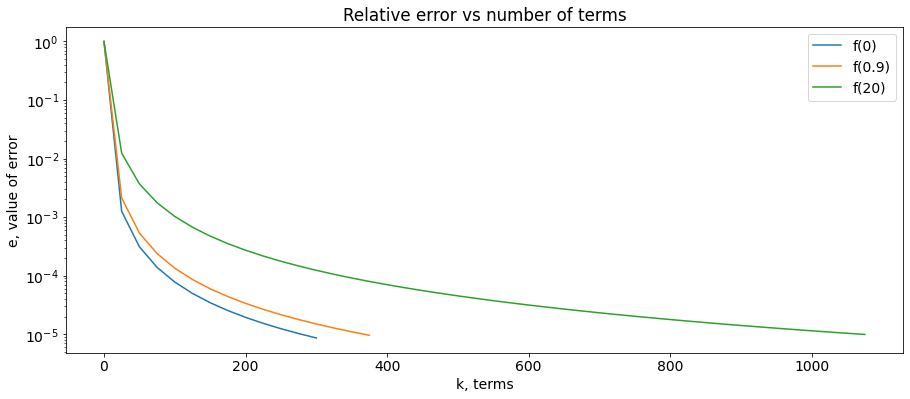

In [28]:
plot_graph(x_val, iterations_new, errors_new)

We see there similar behaviour as in Part 2, except function itself converges much faster. So, we work with smaller numbers, and it takes smaller number of terms to approximate it to needed relative error.



---


##Conclusion

By looking at both graphs, I can conclude that greater number of iterations, the less error. And the relative error of $\varepsilon=10^{-6}$ is not a limit, as graphs does not seem to converge. As long as number of iterations will approach infinity, the error will approach zero. One more conclusion is that the bigger value of $x$ in $f(x)$, the greater number of iterations are needed to compute more or less accurate sum.

Table 1 – Number of terms needed to approximate $f(x)$ with relative error of $\varepsilon=10^{-6}$

$f(0)$ | $f(0.9)$ | $f(20)$
--- | --- | ---
$60800\pm100$ | $96500\pm100$ | $555900\pm100$

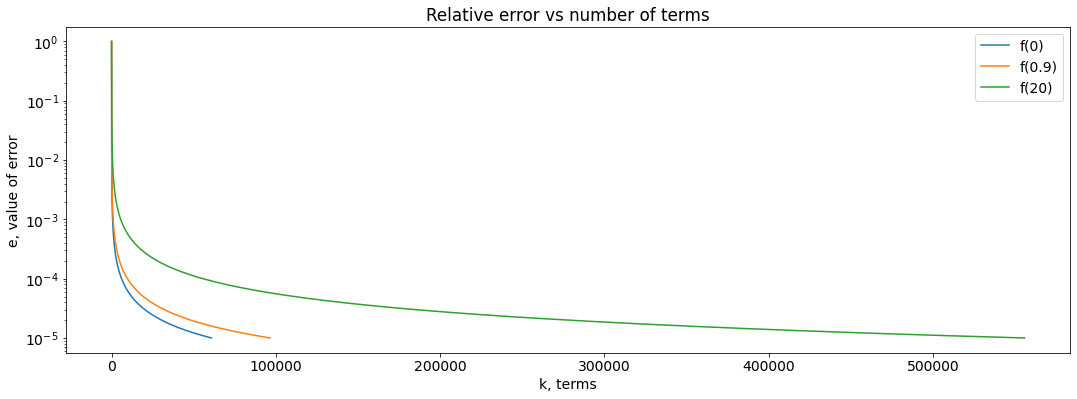

In [24]:
plot_graph(x_val, iterations, errors)

The second graph even more confirms my assumptions. As mathematically $f(x)-f(1)$ converges far more faster.

Table 2 – Number of terms needed to approximate $f(x)-f(1)$ with relative error of $\varepsilon=10^{-6}$

$f(0)-f(1)$ | $f(0.9)-f(1)$ | $f(20)-f(1)$
--- | --- | ---
$300\pm25$ | $375\pm25$ | $1075\pm25$

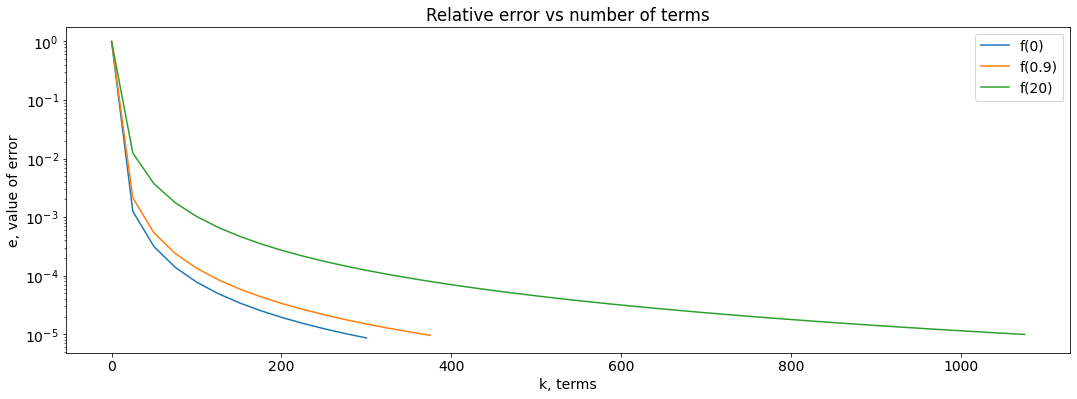

In [25]:
plot_graph(x_val, iterations_new, errors_new)

This experiment has shown the significance of evaluating numerical error of computing. In future studies and researches that require high precision and accuracy, this skill will be crucial as it can directly affect the result. In physics and chemistry, we usually work with very small amount of substances (or oposite). So, we should always take into account this kind of errors.

To improve this experiment in the future, I would suggest to use one formula to approximate but with more values for $x$. For each value of $x$, we could calculate needed number of iterations and plot the graph of iterations versus $x$. This will confirm assumption that numerically for python it is more costly to approximate $f(x)$, for big $x$. 